![example](images/director_shot.jpeg)

# Project Title

**Authors:** Ivan Torres
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

As a new movie studios, I would like to find patterns  between Genres and Rating. With the data recoleted i will determine which genre is trending and how expensive this could be. 

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

### General Libraries used in this Notebook
***


In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline

### TN DataSet
***


In [2]:
# Exploring TN dataset which contains Budget, Domestic and International gross
budget = pd.read_csv('Data/tn.movie_budgets.csv.gz')
budget.head()



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


***
Our columns production_budget, domestic_gross & worldwide_gross contains special characters ( $ , )

and change their type from object to int. Also I will change the release_date type from obj to datetime



Let's clean our columns and do some changes!

In [4]:
# I'm removing placeholders ($ ,)

budget['production_budget']=budget['production_budget'].str.replace('$','')
budget['worldwide_gross']=budget['worldwide_gross'].str.replace('$','')
budget['domestic_gross']=budget['domestic_gross'].str.replace('$','')
budget['production_budget']=budget['production_budget'].str.replace(',','')
budget['worldwide_gross']=budget['worldwide_gross'].str.replace(',','')
budget['domestic_gross']=budget['domestic_gross'].str.replace(',','')

#Changing the type of the columns domestic , production and worldwide from
#Objt to Int

budget['domestic_gross']= pd.to_numeric(budget['domestic_gross'],errors='coerce')
budget['production_budget']= pd.to_numeric(budget['production_budget'],errors='coerce')
budget['worldwide_gross']= pd.to_numeric(budget['worldwide_gross'],errors='coerce')

# Changing the realese date colunm data type from obj to datetime MM/DD/YY


budget['release_date']=pd.to_datetime(budget['release_date'])
budget['release_date']=budget['release_date'].dt.strftime('%m-%d-%Y')
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,12-18-2009,Avatar,425000000,760507625,2776345279
1,2,05-20-2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,06-07-2019,Dark Phoenix,350000000,42762350,149762350
3,4,05-01-2015,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,12-15-2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


Let's take a look to our changes

In [5]:
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,12-18-2009,Avatar,425000000,760507625,2776345279
1,2,05-20-2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,06-07-2019,Dark Phoenix,350000000,42762350,149762350
3,4,05-01-2015,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,12-15-2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [6]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


Everything looks good, let's proceed and check if our dataframe have any missing values 

In [7]:
budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

Perfect! Looks like our DF doesn't have any missing values. Let's move on to our next Dataset

IMBD DATASET TITLE & RATINGS

## IMDB Dataset
***
Let's explore our IMDB data 

In [8]:
#making conection to our DB

conn = sqlite3.connect('data/im.db')
cursor = conn.cursor()

Let's take a look to our tables

In [9]:
#using basic query to take a look of the tables
sql_query = """SELECT name FROM sqlite_master WHERE type='table';"""
cursor.execute(sql_query)
print(cursor.fetchall())

[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


***
This DB has some useful tables! Let's focus on movie_basics & movie_ratings

I will check first with movie_ratings 

In [10]:
imdbrating = pd.read_sql("""SELECT * FROM movie_ratings""",conn)
imdbrating.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [11]:
imdbrating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [12]:
imdbrating.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

***
Looks like our new dataframe is OK, let's check movie_basics

In [13]:
imdbtitle = pd.read_sql("""SELECT * FROM movie_basics""",conn)
imdbtitle.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [14]:
imdbtitle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


***
Our Titles DF have some missing or null values.

I will drop original_title colunm and the change primary_title to movie

In [15]:
imdbtitle = imdbtitle.drop('original_title', 1)
imdbtitle.rename(columns={'primary_title': 'movie'}, inplace=True)

imdbtitle.head(25)

,movie_id,movie,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,2012,82.0,Biography


***
I would like to know if our movie column have duplicated 

In [16]:
imdbtitle['movie'].duplicated().sum()


10073

In [17]:
imdbtitle.loc[imdbtitle['movie'].str.contains('Avatar',case=False)]

,movie_id,movie,start_year,runtime_minutes,genres
22,tt0253093,Gangavataran,2018,134.0,None
1795,tt10168040,My Avatar Horse,2012,NaN,Drama
4315,tt10403262,Xbox Avatar Fun,2019,NaN,Action
11392,tt1630029,Avatar 2,2021,NaN,"Action,Adventure,Fantasy"
14612,tt1720145,Les avatars de la mort d'Empédocle,2010,53.0,Documentary
16337,tt1757678,Avatar 3,2023,NaN,"Action,Adventure,Drama"
17060,tt1775309,Avatar,2011,93.0,Horror
20368,tt1854506,Aliens vs. Avatars,2011,80.0,"Horror,Sci-Fi"
34245,tt2271191,Avatars as Prostitutes,2012,51.0,"Animation,Documentary,Drama"
51456,tt3053768,Koormavatara,2011,NaN,Drama


***
Our table have multiples duplicated rows. I will drop for now only the duplicated rows


In [18]:
#dropping duplicated rows
imdbtitle.drop_duplicates(subset="movie", keep= False, inplace=True)

In [19]:
imdbtitle['movie'].duplicated().sum()

0

***
The code worked! let's explore the rest of our columns

In [20]:
imdbtitle.isna()

,movie_id,movie,start_year,runtime_minutes,genres
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,True,False
4,False,False,False,False,False
...,...,...,...,...,...
146139,False,False,False,False,False
146140,False,False,False,True,False
146141,False,False,False,True,False
146142,False,False,False,False,True


In [21]:
imdbtitle.isnull().sum()

movie_id               0
movie                  0
start_year             0
runtime_minutes    28397
genres              4709
dtype: int64

***

We have missings values in our columns runtime_minutes & genres. Let's explore the genre column first 

In [22]:
imdbtitle['genres'].describe()

count          125180
unique           1058
top       Documentary
freq            30177
Name: genres, dtype: object

In [23]:
imdbt = (imdbtitle['genres'].isnull().sum()
         /len(imdbtitle))*100
print('The percentage of missing genres is {}%'.format(round(imdbt, 2)))

The percentage of missing genres is 3.63%


***
Almost a 4% is missing in our genres column. I will replace this missing values with the most common Genre in our Dataframe

In [24]:
imdbtitle['genres'] = imdbtitle['genres'].fillna('Documentary')

In [25]:
#checking if the code worked
imdbtitle.isnull().sum()

movie_id               0
movie                  0
start_year             0
runtime_minutes    28397
genres                 0
dtype: int64

***
We don't have missing values in our Genres columm, let's start exploring our runtime column

In [26]:
imdbr = (imdbtitle['runtime_minutes'].isnull().sum()
         /len(imdbtitle))*100
print('The percentage of missing runtime data is {}%'.format(round(imdbr, 2)))

The percentage of missing runtime data is 21.86%


In [27]:
imdbtitle['runtime_minutes'].describe()

count    101492.000000
mean         86.037924
std         176.204615
min           1.000000
25%          69.000000
50%          86.000000
75%          99.000000
max       51420.000000
Name: runtime_minutes, dtype: float64

In [28]:
imdbtitle.median()

start_year         2015.0
runtime_minutes      86.0
dtype: float64

The percentage is almost 22%. I will replace the NaN values with the median of our column which is 86 mins, I consider a 86 mins long movie is good nowadays

In [29]:
#Replacing NaN values with the median

imdbtitle['runtime_minutes'] = imdbtitle['runtime_minutes'].fillna(imdbtitle['runtime_minutes'].median())

In [30]:
#Let's check if our code worked
imdbtitle.isnull().sum()

movie_id           0
movie              0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [31]:
#let's check our DF
imdbtitle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129889 entries, 0 to 146143
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         129889 non-null  object 
 1   movie            129889 non-null  object 
 2   start_year       129889 non-null  int64  
 3   runtime_minutes  129889 non-null  float64
 4   genres           129889 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 5.9+ MB


### Merging Dataframes
***
Our dataframe from TN and IMDB looks they are clean, I will proceed and merge them


***
I will start first with the IMDBTITLE & IMDBRATING dataframes

In [32]:
# let's merge our dataframes, lets start first with our IMDB dataframes
imdbdata = pd.merge(left=imdbtitle, right=imdbrating, on="movie_id")

In [33]:
imdbdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64842 entries, 0 to 64841
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         64842 non-null  object 
 1   movie            64842 non-null  object 
 2   start_year       64842 non-null  int64  
 3   runtime_minutes  64842 non-null  float64
 4   genres           64842 non-null  object 
 5   averagerating    64842 non-null  float64
 6   numvotes         64842 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.0+ MB


In [34]:
imdbdata.head()

,movie_id,movie,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,86.0,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [35]:
imdbdata.isnull().sum()

movie_id           0
movie              0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [36]:
imdbdata.duplicated().sum()

0

***
Our new DF looks great and clean! Let's change the indexes of our new Dataframe and the Budget dataframe to movie column and merge them


In [37]:
# Let's change the index to movie

imdbdata.set_index('movie', inplace=True)
imdbdata.head(25)

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes
movie,,,,,,
Sunghursh,tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77
One Day Before the Rainy Season,tt0066787,2019,114.0,"Biography,Drama",7.2,43
The Other Side of the Wind,tt0069049,2018,122.0,Drama,6.9,4517
Sabse Bada Sukh,tt0069204,2018,86.0,"Comedy,Drama",6.1,13
The Wandering Soap Opera,tt0100275,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
Joe Finds Grace,tt0137204,2017,83.0,"Adventure,Animation,Comedy",8.1,263
Pál Adrienn,tt0146592,2010,136.0,Drama,6.8,451
So Much for Justice!,tt0154039,2010,100.0,History,4.6,64
Cooper and Hemingway: The True Gen,tt0159369,2013,180.0,Documentary,7.6,53


In [38]:
budget.set_index('movie', inplace=True)
budget.head(25)

,id,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,,
Avatar,1,12-18-2009,425000000,760507625,2776345279
Pirates of the Caribbean: On Stranger Tides,2,05-20-2011,410600000,241063875,1045663875
Dark Phoenix,3,06-07-2019,350000000,42762350,149762350
Avengers: Age of Ultron,4,05-01-2015,330600000,459005868,1403013963
Star Wars Ep. VIII: The Last Jedi,5,12-15-2017,317000000,620181382,1316721747
Star Wars Ep. VII: The Force Awakens,6,12-18-2015,306000000,936662225,2053311220
Avengers: Infinity War,7,04-27-2018,300000000,678815482,2048134200
Pirates of the Caribbean: At Worldâs End,8,05-24-2007,300000000,309420425,963420425
Justice League,9,11-17-2017,300000000,229024295,655945209


In [39]:
#Let's drop id and movie id columns from our dataframes
imdbdata = imdbdata.drop('movie_id', 1)
budget = budget.drop('id',1)

In [40]:
imdbdata.head(25)

,start_year,runtime_minutes,genres,averagerating,numvotes
movie,,,,,
Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
The Other Side of the Wind,2018,122.0,Drama,6.9,4517
Sabse Bada Sukh,2018,86.0,"Comedy,Drama",6.1,13
The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
Pál Adrienn,2010,136.0,Drama,6.8,451
So Much for Justice!,2010,100.0,History,4.6,64
Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53


In [41]:
budget.head(25)

,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,
Avatar,12-18-2009,425000000,760507625,2776345279
Pirates of the Caribbean: On Stranger Tides,05-20-2011,410600000,241063875,1045663875
Dark Phoenix,06-07-2019,350000000,42762350,149762350
Avengers: Age of Ultron,05-01-2015,330600000,459005868,1403013963
Star Wars Ep. VIII: The Last Jedi,12-15-2017,317000000,620181382,1316721747
Star Wars Ep. VII: The Force Awakens,12-18-2015,306000000,936662225,2053311220
Avengers: Infinity War,04-27-2018,300000000,678815482,2048134200
Pirates of the Caribbean: At Worldâs End,05-24-2007,300000000,309420425,963420425
Justice League,11-17-2017,300000000,229024295,655945209


In [42]:
#Ok time to merge our dataframes
df = pd.merge(left=imdbdata, right=budget, on="movie")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1634 entries, Foodfight! to The Terrorist
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   start_year         1634 non-null   int64  
 1   runtime_minutes    1634 non-null   float64
 2   genres             1634 non-null   object 
 3   averagerating      1634 non-null   float64
 4   numvotes           1634 non-null   int64  
 5   release_date       1634 non-null   object 
 6   production_budget  1634 non-null   int64  
 7   domestic_gross     1634 non-null   int64  
 8   worldwide_gross    1634 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 127.7+ KB


In [44]:
df.head(25)

,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,,,,,,
Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,12-31-2012,45000000,0,73706
The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,12-25-2013,91000000,58236838,187861183
A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,09-19-2014,28000000,26017685,62108587
Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,06-12-2015,215000000,652270625,1648854864
The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787,10-28-2011,45000000,13109815,21544732
Anderson's Cross,2010,98.0,"Comedy,Drama,Romance",5.5,106,12-31-2010,300000,0,0
Tangled,2010,100.0,"Adventure,Animation,Comedy",7.8,366366,11-24-2010,260000000,200821936,586477240
John Carter,2012,132.0,"Action,Adventure,Sci-Fi",6.6,241792,03-09-2012,275000000,73058679,282778100
Action Jackson,2014,144.0,"Action,Thriller",3.3,2862,02-12-1988,7000000,20257000,20257000


***
Now we have a single Dataframe to work with. I'm interested to see which movie is the top grossing in our new dataframe

In [45]:
#Lets create a new column to know how much grossing made each movie.
df['total_gross']=df['worldwide_gross']-df['production_budget']
df.head(25)

,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,total_gross
movie,,,,,,,,,,
Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,12-31-2012,45000000,0,73706,-44926294
The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,12-25-2013,91000000,58236838,187861183,96861183
A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,09-19-2014,28000000,26017685,62108587,34108587
Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,06-12-2015,215000000,652270625,1648854864,1433854864
The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787,10-28-2011,45000000,13109815,21544732,-23455268
Anderson's Cross,2010,98.0,"Comedy,Drama,Romance",5.5,106,12-31-2010,300000,0,0,-300000
Tangled,2010,100.0,"Adventure,Animation,Comedy",7.8,366366,11-24-2010,260000000,200821936,586477240,326477240
John Carter,2012,132.0,"Action,Adventure,Sci-Fi",6.6,241792,03-09-2012,275000000,73058679,282778100,7778100
Action Jackson,2014,144.0,"Action,Thriller",3.3,2862,02-12-1988,7000000,20257000,20257000,13257000


In [46]:
df = df.sort_values(by=['total_gross'], ascending=False)
df.head(25)

,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,total_gross
movie,,,,,,,,,,
Avatar,2011,93.0,Horror,6.1,43,12-18-2009,425000000,760507625,2776345279,2351345279
Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,04-27-2018,300000000,678815482,2048134200,1748134200
Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,06-12-2015,215000000,652270625,1648854864,1433854864
Furious 7,2015,137.0,"Action,Crime,Thriller",7.2,335074,04-03-2015,190000000,353007020,1518722794,1328722794
The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,05-04-2012,225000000,623279547,1517935897,1292935897
Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",7.3,516148,02-16-2018,200000000,700059566,1348258224,1148258224
Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi",6.2,219125,06-22-2018,170000000,417719760,1305772799,1135772799
Minions,2015,91.0,"Adventure,Animation,Comedy",6.4,193917,07-10-2015,74000000,336045770,1160336173,1086336173
Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594,05-01-2015,330600000,459005868,1403013963,1072413963


***

Our DF is looking good. But something looks odd. Avatar have some erros let's fix it

In [47]:
imdbdata.loc['Avatar']

start_year           2011
runtime_minutes        93
genres             Horror
averagerating         6.1
numvotes               43
Name: Avatar, dtype: object

In [48]:
# Changing the values
df.at['Avatar','genres']= 'Action,Adventure,Sci-Fi'
df.at['Avatar','start_year']= 2009
df.at['Avatar','runtime_minutes'] = 160.0
#We now James Cameron Avatar was a success, i will replace the average rating
# With some high values
df.at['Avatar','averagerating'] = df['averagerating'].max()
df.at['Avatar','numvotes'] = df['numvotes'].max()
df.head(25)

,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,total_gross
movie,,,,,,,,,,
Avatar,2009,160.0,"Action,Adventure,Sci-Fi",9.1,1841066,12-18-2009,425000000,760507625,2776345279,2351345279
Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,04-27-2018,300000000,678815482,2048134200,1748134200
Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,06-12-2015,215000000,652270625,1648854864,1433854864
Furious 7,2015,137.0,"Action,Crime,Thriller",7.2,335074,04-03-2015,190000000,353007020,1518722794,1328722794
The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,05-04-2012,225000000,623279547,1517935897,1292935897
Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",7.3,516148,02-16-2018,200000000,700059566,1348258224,1148258224
Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi",6.2,219125,06-22-2018,170000000,417719760,1305772799,1135772799
Minions,2015,91.0,"Adventure,Animation,Comedy",6.4,193917,07-10-2015,74000000,336045770,1160336173,1086336173
Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594,05-01-2015,330600000,459005868,1403013963,1072413963


***
Now that we have our DF clean and sorted from the top grossing to the lesser ones, I want to focus in our top 100 grossing movies

In [49]:
df100 = df.sort_values(
    # indexed to only include the first 100 values
    by=['worldwide_gross'], ascending=False)[:100]
#Making sure our new DF is a Pandas DF
df100 = pd.DataFrame(df100)
#Let's check our new DF
df100

,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,total_gross
movie,,,,,,,,,,
Avatar,2009,160.0,"Action,Adventure,Sci-Fi",9.1,1841066,12-18-2009,425000000,760507625,2776345279,2351345279
Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,04-27-2018,300000000,678815482,2048134200,1748134200
Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,06-12-2015,215000000,652270625,1648854864,1433854864
Furious 7,2015,137.0,"Action,Crime,Thriller",7.2,335074,04-03-2015,190000000,353007020,1518722794,1328722794
The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,05-04-2012,225000000,623279547,1517935897,1292935897
...,...,...,...,...,...,...,...,...,...,...
Godzilla,2014,123.0,"Action,Adventure,Sci-Fi",6.4,350687,05-16-2014,160000000,200676069,529076069,369076069
Hotel Transylvania 3: Summer Vacation,2018,97.0,"Adventure,Animation,Comedy",6.3,42299,07-13-2018,65000000,167500092,527079962,462079962
How to Train Your Dragon: The Hidden World,2019,104.0,"Action,Adventure,Animation",7.6,60769,02-22-2019,129000000,160791800,519258283,390258283


In [50]:
df100.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, Avatar to Kung Fu Panda 3
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   start_year         100 non-null    int64  
 1   runtime_minutes    100 non-null    float64
 2   genres             100 non-null    object 
 3   averagerating      100 non-null    float64
 4   numvotes           100 non-null    int64  
 5   release_date       100 non-null    object 
 6   production_budget  100 non-null    int64  
 7   domestic_gross     100 non-null    int64  
 8   worldwide_gross    100 non-null    int64  
 9   total_gross        100 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 8.6+ KB


***

Our new top 100 DF is ready, I want to know which genre is more protfitable. I will take a look in our genre column in our new top 100 DF

In [51]:
#Let's check how many unique genres we have in our new DF
print(df100["genres"].unique())

print(df100["genres"].nunique())

['Action,Adventure,Sci-Fi' 'Action,Crime,Thriller'
 'Action,Adventure,Animation' 'Adventure,Animation,Comedy'
 'Action,Adventure,Fantasy' 'Action,Adventure,Thriller' 'Action,Thriller'
 'Adventure,Family,Fantasy' 'Action,Adventure,Comedy' 'Adventure,Fantasy'
 'Biography,Drama,Music' 'Action,Adventure,Family'
 'Action,Adventure,Drama' 'Adventure,Drama,Fantasy' 'Horror,Thriller'
 'Drama,Sci-Fi,Thriller' 'Adventure,Drama,Sci-Fi'
 'Animation,Comedy,Family' 'Comedy,Mystery' 'Comedy,Drama,Family'
 'Drama,Romance,Thriller' 'Comedy,Fantasy' 'Action,Biography,Drama'
 'Action,Adventure,Crime' 'Action,Adventure,Horror' 'Action,Horror,Sci-Fi']
26


In [52]:
#I will split our genres
df100['genres'] = df100['genres'].str.split(",")
df100.head()


,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,total_gross
movie,,,,,,,,,,
Avatar,2009,160.0,"[Action, Adventure, Sci-Fi]",9.1,1841066,12-18-2009,425000000,760507625,2776345279,2351345279
Avengers: Infinity War,2018,149.0,"[Action, Adventure, Sci-Fi]",8.5,670926,04-27-2018,300000000,678815482,2048134200,1748134200
Jurassic World,2015,124.0,"[Action, Adventure, Sci-Fi]",7.0,539338,06-12-2015,215000000,652270625,1648854864,1433854864
Furious 7,2015,137.0,"[Action, Crime, Thriller]",7.2,335074,04-03-2015,190000000,353007020,1518722794,1328722794
The Avengers,2012,143.0,"[Action, Adventure, Sci-Fi]",8.1,1183655,05-04-2012,225000000,623279547,1517935897,1292935897


In [53]:
all_genres = set()
# Iterate through genres column and for each element
for genres in df100['genres']:
    if genres:
        # add genre to the set
        all_genres.update(genres)

In [54]:
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller'}

I will proceed to create a column with each genre to tally, that way we could get some valueble insights 

In [55]:
# Iterate through the set.
for genre in all_genres:
    # I Will fill the new column with 0
    df100[genre] = np.zeros(shape=df100.shape[0])
# Check that the changes took place.                                
df100.head()

,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,total_gross,...,Music,Animation,Comedy,Action,Romance,Family,Adventure,Sci-Fi,Horror,Thriller
movie,,,,,,,,,,,,,,,,,,,,,
Avatar,2009,160.0,"[Action, Adventure, Sci-Fi]",9.1,1841066,12-18-2009,425000000,760507625,2776345279,2351345279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Avengers: Infinity War,2018,149.0,"[Action, Adventure, Sci-Fi]",8.5,670926,04-27-2018,300000000,678815482,2048134200,1748134200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jurassic World,2015,124.0,"[Action, Adventure, Sci-Fi]",7.0,539338,06-12-2015,215000000,652270625,1648854864,1433854864,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Furious 7,2015,137.0,"[Action, Crime, Thriller]",7.2,335074,04-03-2015,190000000,353007020,1518722794,1328722794,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Avengers,2012,143.0,"[Action, Adventure, Sci-Fi]",8.1,1183655,05-04-2012,225000000,623279547,1517935897,1292935897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
# Iterate through the genres column as an index
# the genre rows. 
for index, row in df100.iterrows():
    # If the value in genres
    if row['genres']:
        # mathces a genre column
        for genre in row['genres']:
            # change that value to 1.
            df100.loc[index, genre] = 1
# Lets check our changes.
df100.head()

,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,total_gross,...,Music,Animation,Comedy,Action,Romance,Family,Adventure,Sci-Fi,Horror,Thriller
movie,,,,,,,,,,,,,,,,,,,,,
Avatar,2009,160.0,"[Action, Adventure, Sci-Fi]",9.1,1841066,12-18-2009,425000000,760507625,2776345279,2351345279,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
Avengers: Infinity War,2018,149.0,"[Action, Adventure, Sci-Fi]",8.5,670926,04-27-2018,300000000,678815482,2048134200,1748134200,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
Jurassic World,2015,124.0,"[Action, Adventure, Sci-Fi]",7.0,539338,06-12-2015,215000000,652270625,1648854864,1433854864,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
Furious 7,2015,137.0,"[Action, Crime, Thriller]",7.2,335074,04-03-2015,190000000,353007020,1518722794,1328722794,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
The Avengers,2012,143.0,"[Action, Adventure, Sci-Fi]",8.1,1183655,05-04-2012,225000000,623279547,1517935897,1292935897,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


***

Lets create a list with our genres and count how many of each genre we have in our top 100 movies DF

In [57]:
cols = list(df100.columns)
cols

['start_year',
 'runtime_minutes',
 'genres',
 'averagerating',
 'numvotes',
 'release_date',
 'production_budget',
 'domestic_gross',
 'worldwide_gross',
 'total_gross',
 'Crime',
 'Fantasy',
 'Biography',
 'Drama',
 'Mystery',
 'Music',
 'Animation',
 'Comedy',
 'Action',
 'Romance',
 'Family',
 'Adventure',
 'Sci-Fi',
 'Horror',
 'Thriller']

In [58]:
genre_col = cols[10:]
genre_col

['Crime',
 'Fantasy',
 'Biography',
 'Drama',
 'Mystery',
 'Music',
 'Animation',
 'Comedy',
 'Action',
 'Romance',
 'Family',
 'Adventure',
 'Sci-Fi',
 'Horror',
 'Thriller']

In [59]:
# Create a new dictionary
genre_count = {}
# Iterate through the columns associated with genres, setting the name of the
# column as the keys in the dictionary.
for col in genre_col:
    # Get the total of all the genre counts where the value equaled 1,
    # which we set previously
    count = np.sum(df100[col] == 1).sum()
    # Set the values of the dictionary equal to the total of the counts
    genre_count[col] = count

genre_count

{'Crime': 4,
 'Fantasy': 17,
 'Biography': 2,
 'Drama': 10,
 'Mystery': 1,
 'Music': 1,
 'Animation': 26,
 'Comedy': 29,
 'Action': 66,
 'Romance': 1,
 'Family': 7,
 'Adventure': 85,
 'Sci-Fi': 33,
 'Horror': 3,
 'Thriller': 9}

### Graphing our findings
***
I will proceed to use data visualization and basic analysis to look for usefull insights. I will take a look of the top 100 grossing movies by Production budget

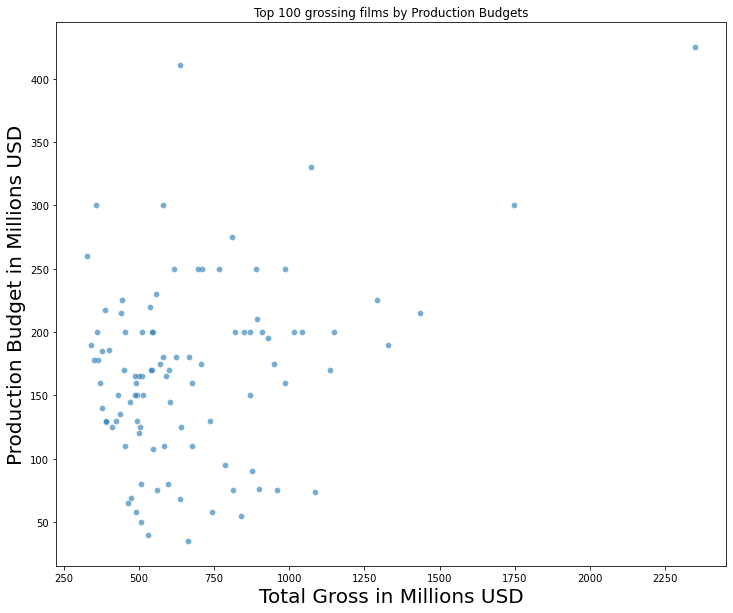

In [60]:
# https://github.com/mojo-flat/phase1_project_data/blob/main/first_notebook.ipynb
# The line of codes used to graph were taken from the notebook stated before

# Create a plot and set the appropriate size
plt.figure(figsize=(12, 10))
# Draw a scatterplot based on worldwide gross and production budget,
# and divideing the values by 1 million to make plot axes more readable.
sns.scatterplot(x=df100['total_gross']/1000000,
                y=df100['production_budget']/1000000, alpha=0.6, palette='blues')
# Set title of plot
plt.title('Top 100 grossing films by Production Budgets')
# Set y-axis label and fontsize
plt.ylabel('Production Budget in Millions USD', fontsize=20)
# Set x-axis label and fontsize
plt.xlabel('Total Gross in Millions USD', fontsize=20)
# Change x-axis ticks from scientific notation to integers
plt.ticklabel_format(style='plain', axis='x')
# Change y-axis ticks from scientific notation to integers
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

There is a little clustering between the Y axis $100-$200 millions 

Lets create a new column to categorize our movies by production budget

In [61]:
# I used the lambda function to help me to 
#To change from scientific notation to integers
df100['production_budget'].describe().apply(lambda x: format(x, 'f'))

count          100.000000
mean     168902000.000000
std       72475921.435183
min       35000000.000000
25%      125000000.000000
50%      170000000.000000
75%      200000000.000000
max      425000000.000000
Name: production_budget, dtype: object

I will use bins to categorize our data, our bin will have a range of 100 millions dollar.

In [62]:
#https://stackoverflow.com/questions/45751390/pandas-how-to-use-pd-cut
# Create a list of integers, including infinity defined by numpy.
bins = [34000000, 134000000, 234000000, 334000000, np.inf]
# Create a name for the bins expressing the range for each bin.
names = ['$35-$135 million', '$135-$235 million', '$235-$335 million',
         '$335-$425 million']
#Using cut function  
df100['budget_range'] = pd.cut(
    #cut at the bin values and label with the names list.
    df100['production_budget'], bins=bins, labels=names)

# Make sure the datatypes are correct.
print(df100.dtypes)

start_year              int64
runtime_minutes       float64
genres                 object
averagerating         float64
numvotes                int64
release_date           object
production_budget       int64
domestic_gross          int64
worldwide_gross         int64
total_gross             int64
Crime                 float64
Fantasy               float64
Biography             float64
Drama                 float64
Mystery               float64
Music                 float64
Animation             float64
Comedy                float64
Action                float64
Romance               float64
Family                float64
Adventure             float64
Sci-Fi                float64
Horror                float64
Thriller              float64
budget_range         category
dtype: object


In [63]:
# Create a list of the dictionary keys
keys = list(genre_count.keys())
# Create a list of the dictionary values
values = list(genre_count.values())

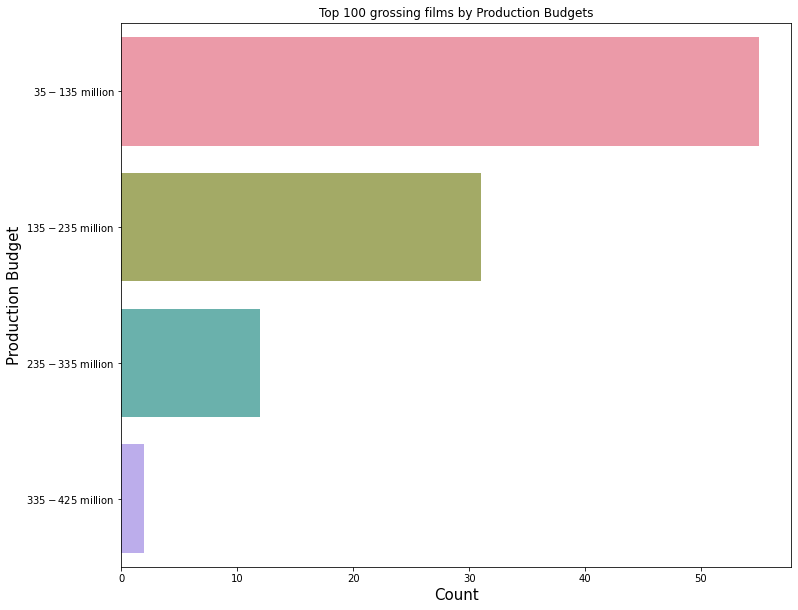

In [64]:

# Create a plot figure and define its size
plt.figure(figsize=(12, 10))
# Draw a seaborn barplot plotting range names on y-axis and counts of films 
# in range on the x-axis
sns.barplot(y=names, x=df100['budget_range'].value_counts(
), alpha=0.8, palette="husl")
# Set title of plot
plt.title('Top 100 grossing films by Production Budgets')
# Set y-axis label and font size
plt.ylabel('Production Budget', fontsize=15)
# Set x-axis label and font size
plt.xlabel('Count', fontsize=15)

# Show plot
plt.savefig("./images/grossing_films_by_productions.png", dpi=150)
plt.show()

More than 50 movies in our DF had a Production budget in  between 35 - 135 millions

***
I will start graphing which genre is the most grossing in our DF


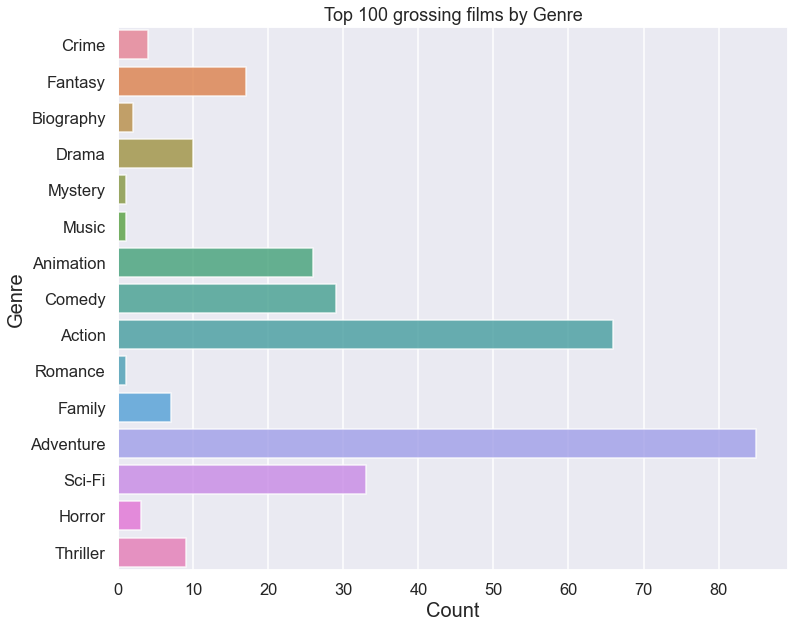

In [65]:
# Set the style of the seaborn plot 
sns.set(style="darkgrid")
# Set the scale plot to be larger and easier to read.
sns.set_context("talk")
# Create a plot and size it appropriately for information shown
plt.figure(figsize=(12,10))
# Draw the seaborn barplot
sns.barplot(y = keys, x = values, alpha=0.8, palette="husl")
# Set the barplot's title.
plt.title('Top 100 grossing films by Genre')
# Label the y-axis
plt.ylabel('Genre', fontsize=20)
# Label the x-axis
plt.xlabel('Count', fontsize=20)

# Show the plot                
plt.savefig("./images/grossing_films_by_genre.png", dpi=150)
plt.show()

Looks like the genre that is most grossing is the Adventure Genre, followed by Action and Sci-Fi

Lets create a box plot of our top 3 genres to compare them with the rest of the genres 

<function matplotlib.pyplot.show(close=None, block=None)>

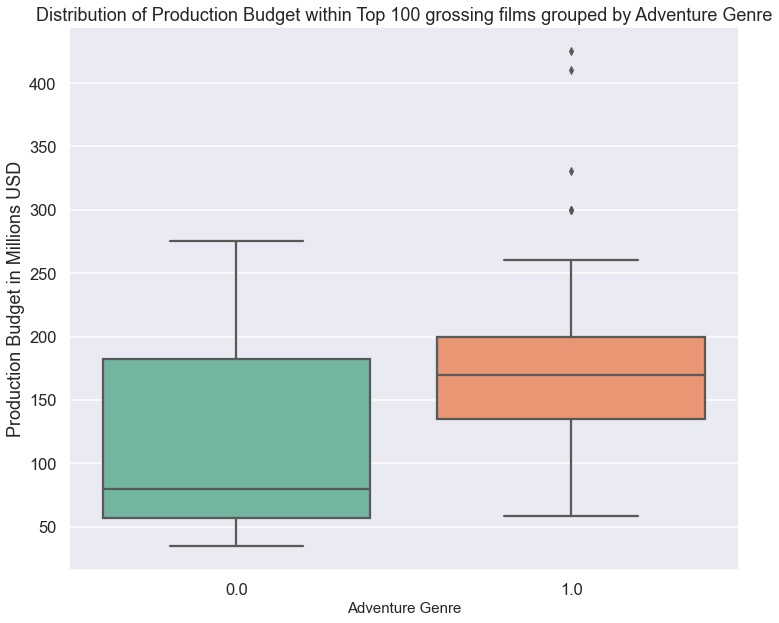

In [66]:
# Create a plot and define its size.
plt.figure(figsize=(12, 10))
# Draw a seaborn boxplot based on the Adventure genre and production budgets
sns.boxplot(x=df100['Adventure'],
            y=df100['production_budget']/1000000, palette="Set2")
# Set title of plot
plt.title('Distribution of Production Budget within Top 100 grossing films grouped by Adventure Genre')
# Set x-axis label and font size
plt.xlabel('Adventure Genre', fontsize=15)
# Set y-axis label
plt.ylabel('Production Budget in Millions USD')
# Remove scientific notation from y-axis tick labels
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show

The Adventure genre shows that cost a little bit more showing us a median around 175 millions dollar, with a outliers going between 300 and 426 millions dollars

<function matplotlib.pyplot.show(close=None, block=None)>

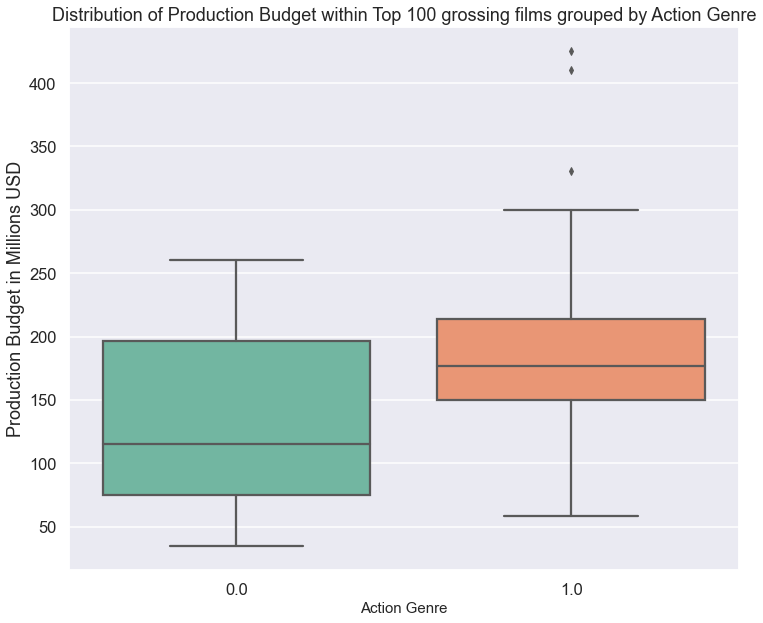

In [67]:
# Create a plot and define its size.
plt.figure(figsize=(12, 10))
# Draw a seaborn boxplot based on the Action genre and production budgets
sns.boxplot(x=df100['Action'],
            y=df100['production_budget']/1000000, palette="Set2")
# Set title of plot
plt.title('Distribution of Production Budget within Top 100 grossing films grouped by Action Genre')
# Set x-axis label and font size
plt.xlabel('Action Genre', fontsize=15)
# Set y-axis label
plt.ylabel('Production Budget in Millions USD')
# Remove scientific notation from y-axis tick labels
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show

The action genre shows a median of 50 million dollar above of the rest the genres and an IQR higher 

<function matplotlib.pyplot.show(close=None, block=None)>

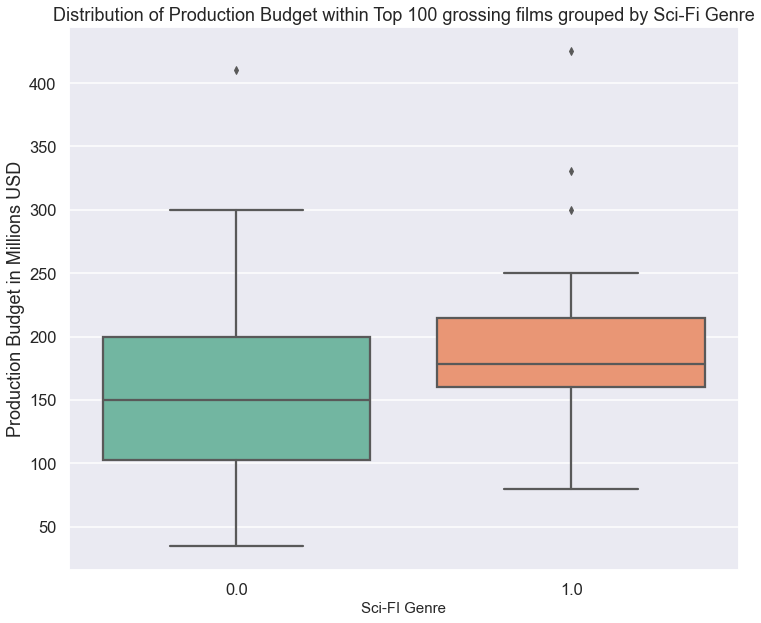

In [68]:
# Create a plot and define its size.
plt.figure(figsize=(12, 10))
# Draw a seaborn boxplot based on the Sci-Fi genre and production budgets
sns.boxplot(x=df100['Sci-Fi'],
            y=df100['production_budget']/1000000, palette="Set2")
# Set title of plot
plt.title('Distribution of Production Budget within Top 100 grossing films grouped by Sci-Fi Genre')
# Set x-axis label and font size
plt.xlabel('Sci-FI Genre', fontsize=15)
# Set y-axis label
plt.ylabel('Production Budget in Millions USD')
# Remove scientific notation from y-axis tick labels
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show

And lastly the Sci-fi genre shows a median and IQR higher than the rest of the genres, but with maximun whisker lower that the rest of the genres. Looks like our 3 top genres cost more to produce than the others genres in our top 100 grossing films

<function matplotlib.pyplot.show(close=None, block=None)>

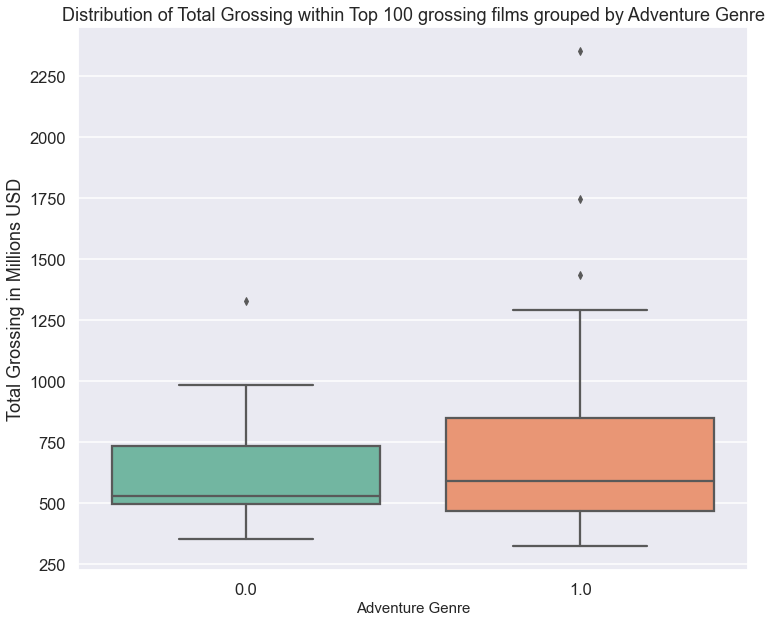

In [69]:
# Create a plot and define its size.
plt.figure(figsize=(12, 10))
# Draw a seaborn boxplot based on the Adventure genre and Total Grossing
sns.boxplot(x=df100['Adventure'],
            y=df100['total_gross']/1000000, palette="Set2")
# Set title of plot
plt.title('Distribution of Total Grossing within Top 100 grossing films grouped by Adventure Genre')
# Set x-axis label and font size
plt.xlabel('Adventure Genre', fontsize=15)
# Set y-axis label
plt.ylabel('Total Grossing in Millions USD')
# Remove scientific notation from y-axis tick labels
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show

It's look like our minimun is almost similar while our maximum is a difference over 250 Millions USD, also the adventure genre have a large Interquantile than the non adventure genre with a few outliers. Lets proceed and check the Action genre

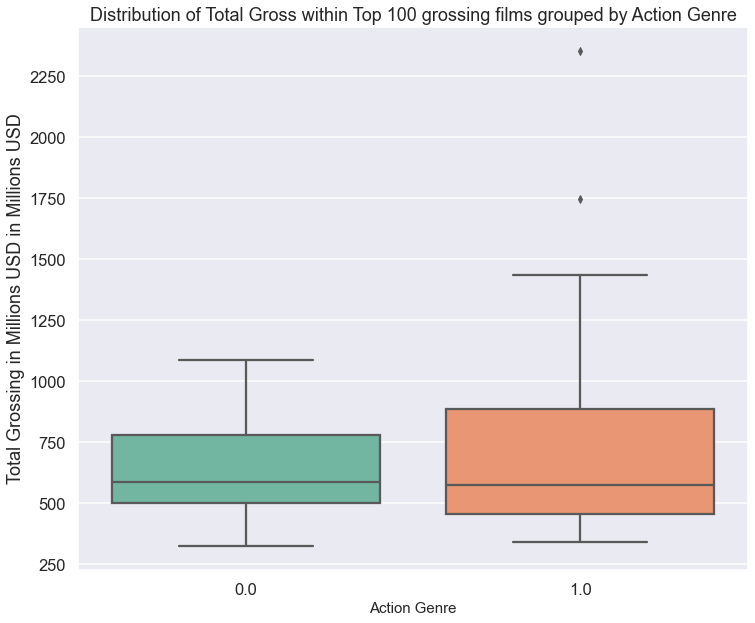

In [70]:
# Create a plot and define its size.
plt.figure(figsize=(12, 10))
# Draw a seaborn boxplot based on the Action genre and total grossing
sns.boxplot(x=df100['Action'],
            y=df100['total_gross']/1000000, palette="Set2")
# Set title of plot
plt.title('Distribution of Total Gross within Top 100 grossing films grouped by Action Genre')
# Set x-axis label and font size
plt.xlabel('Action Genre', fontsize=15)
# Set y-axis label
plt.ylabel('Total Grossing in Millions USD in Millions USD')
# Remove scientific notation from y-axis tick labels
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show()

Here our minimuns and median are almost equal but the Action genre interquatile is bigger than the non action genre
and our difference maximun whiskers between our 2 boxes is more than 250 millions and the maximun for our Action genres is reaching the 1500 millions USD with a couple outliers.

Lets check the Sci-Fi genre

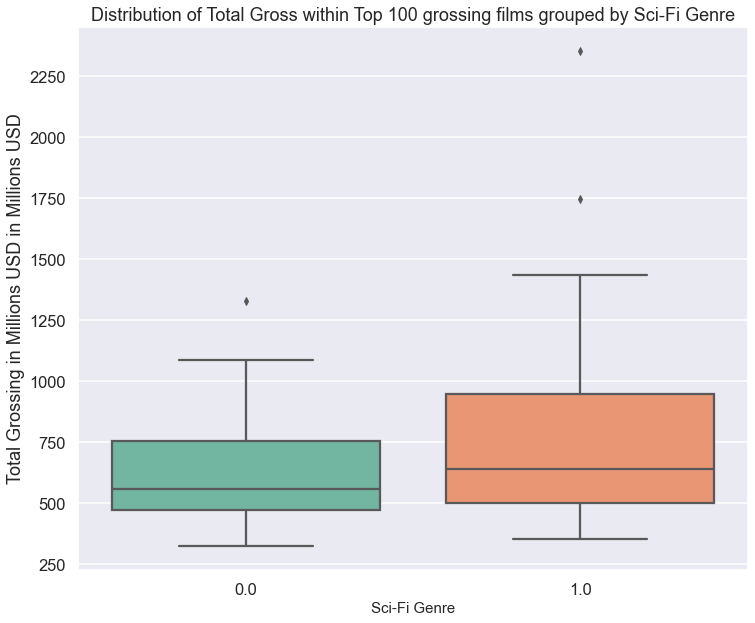

In [71]:
#Lets check our 3rd top grossing genre
# Create a plot and define its size.
plt.figure(figsize=(12, 10))
# Draw a seaborn boxplot based on the Sci-Fi genre and total grossing
sns.boxplot(x=df100['Sci-Fi'],
            y=df100['total_gross']/1000000, palette="Set2")
# Set title of plot
plt.title('Distribution of Total Gross within Top 100 grossing films grouped by Sci-Fi Genre')
# Set x-axis label and font size
plt.xlabel('Sci-Fi Genre', fontsize=15)
# Set y-axis label
plt.ylabel('Total Grossing in Millions USD in Millions USD')
# Remove scientific notation from y-axis tick labels
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show()

The interquartile of the Sci-fi genre is bigger than the others genres and the median is slightly above from the rest, The minimun whiskers are almost identical and the maximun there is a difference around $250 millions

### Runtime graph

***
I will explore and analyze the runtime column to determine the lenght of the our top 100 grossing movies 

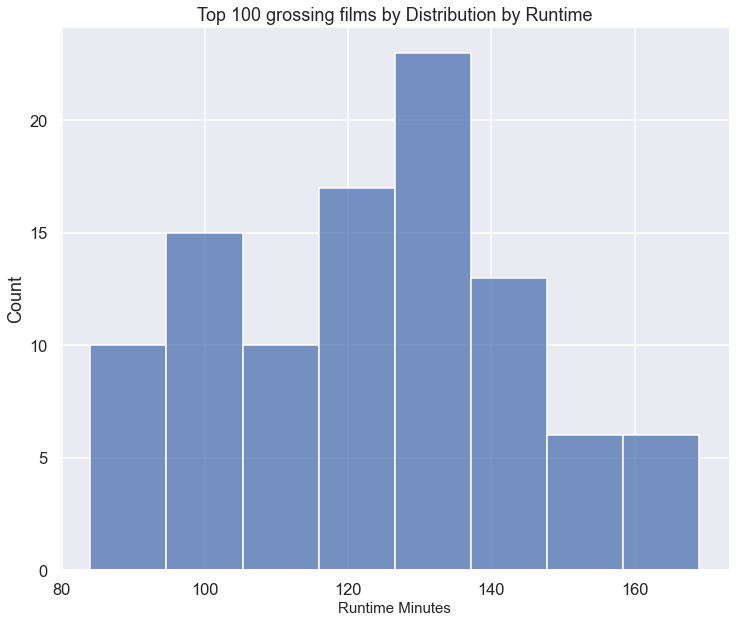

In [72]:
# Create a plot and define its size.
plt.figure(figsize=(12, 10))
# Draw a histplot showing the distribution of top grossing film by
# runtime minutes.
sns.histplot(df100['runtime_minutes'], color="b")
# Set title of plot
plt.title('Top 100 grossing films by Distribution by Runtime')
# Set x-axis label and define font
plt.xlabel('Runtime Minutes', fontsize=15)

# Show plot
plt.savefig("./images/grossing_films_by_runtime.png", dpi=150)
plt.show()

Our histogram show that our top 100 movies have a lenght of 80 to 150 minutes. I will take a look of this runtimes with our  top 3 genres

<function matplotlib.pyplot.show(close=None, block=None)>

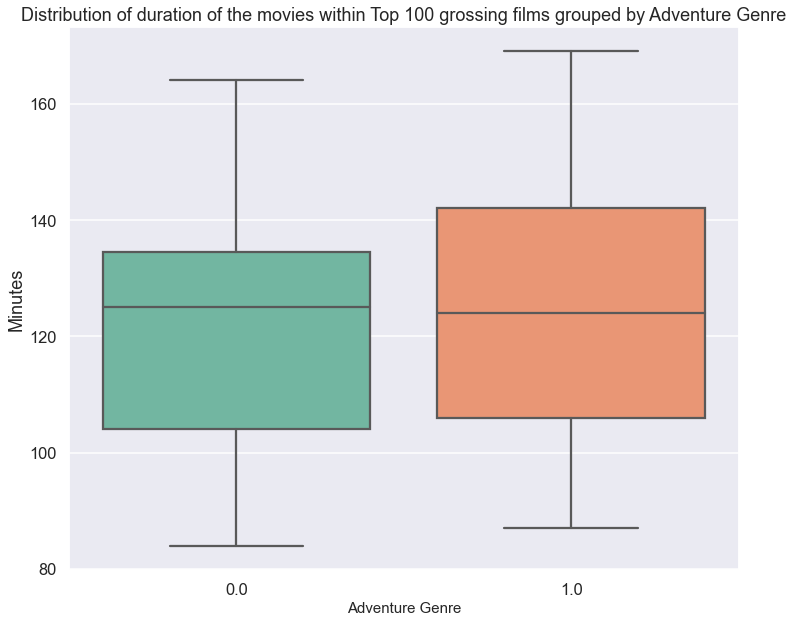

In [73]:
# Create a plot and define its size.
plt.figure(figsize=(12, 10))
# Draw a seaborn boxplot based on the Adventure genre and production budgets
sns.boxplot(x=df100['Adventure'],
            y=df100['runtime_minutes'], palette="Set2")
# Set title of plot
plt.title('Distribution of duration of the movies within Top 100 grossing films grouped by Adventure Genre')
# Set x-axis label and font size
plt.xlabel('Adventure Genre', fontsize=15)
# Set y-axis label
plt.ylabel('Minutes')
# Remove scientific notation from y-axis tick labels
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show

The adventure genre have a median slightly above of the 120 mins mark and bigger IQR than the rest of the genres  

<function matplotlib.pyplot.show(close=None, block=None)>

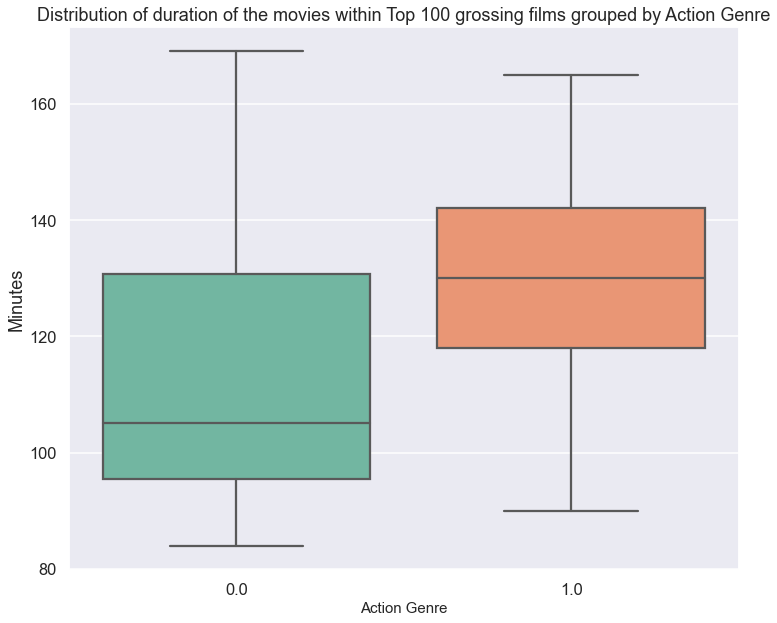

In [74]:
# Create a plot and define its size.
plt.figure(figsize=(12, 10))
# Draw a seaborn boxplot based on the Action genre and production budgets
sns.boxplot(x=df100['Action'],
            y=df100['runtime_minutes'], palette="Set2")
# Set title of plot
plt.title('Distribution of duration of the movies within Top 100 grossing films grouped by Action Genre')
# Set x-axis label and font size
plt.xlabel('Action Genre', fontsize=15)
# Set y-axis label
plt.ylabel('Minutes')
# Remove scientific notation from y-axis tick labels
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show

The Action genre show a smaller IQR than the rest of the genres, showing us a median around the 130 mins

<function matplotlib.pyplot.show(close=None, block=None)>

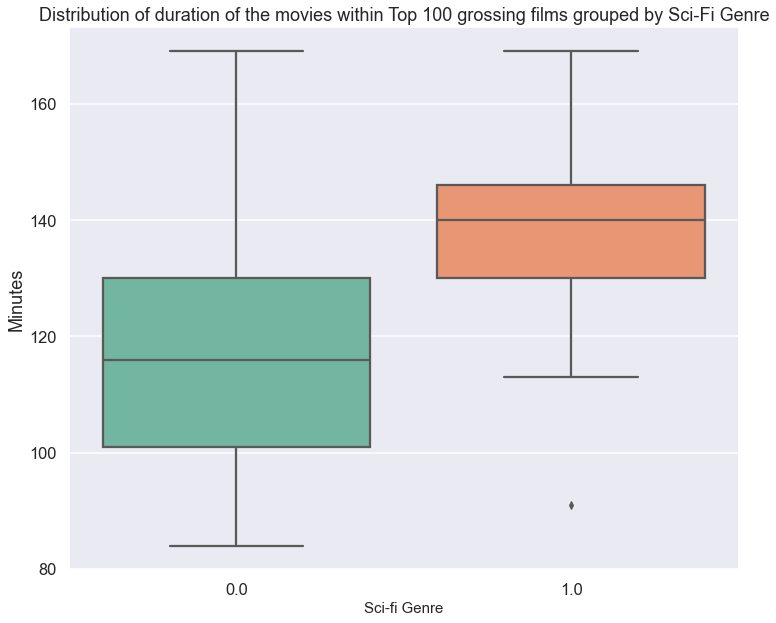

In [75]:
# Create a plot and define its size.
plt.figure(figsize=(12, 10))
# Draw a seaborn boxplot based on the Sci-Fi genre and production budgets
sns.boxplot(x=df100['Sci-Fi'],
            y=df100['runtime_minutes'], palette="Set2")
# Set title of plot
plt.title('Distribution of duration of the movies within Top 100 grossing films grouped by Sci-Fi Genre')
# Set x-axis label and font size
plt.xlabel('Sci-fi Genre', fontsize=15)
# Set y-axis label
plt.ylabel('Minutes')
# Remove scientific notation from y-axis tick labels
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show

The Sci-Fi genre have an smaller IQR compared to the others genres and shows a median of 140 mins, with an outlier marking the  90 mins

In [76]:
df100['runtime_minutes'].describe()

count    100.000000
mean     123.420000
std       21.213765
min       84.000000
25%      105.500000
50%      124.000000
75%      137.750000
max      169.000000
Name: runtime_minutes, dtype: float64

In [77]:
# Create a list of integers, including infinity defined by numpy.
mins = [83, 103, 123, 143, np.inf]
# Create a name for the bins expressing the range for each bin.
groups = ['84 to 104 min', '104 to 124 min', '124 to 144 min',
         '144 to 169 min']
# Make a new categorical column names budget range, which is made of the 
# segments from the production budget column, 
df100['minute_range'] = pd.cut(
    #cut at the bin values and label with the names list.
    df100['runtime_minutes'], bins=mins, labels=groups)

# Make sure the datatypes are correct.
print(df100.dtypes)

start_year              int64
runtime_minutes       float64
genres                 object
averagerating         float64
numvotes                int64
release_date           object
production_budget       int64
domestic_gross          int64
worldwide_gross         int64
total_gross             int64
Crime                 float64
Fantasy               float64
Biography             float64
Drama                 float64
Mystery               float64
Music                 float64
Animation             float64
Comedy                float64
Action                float64
Romance               float64
Family                float64
Adventure             float64
Sci-Fi                float64
Horror                float64
Thriller              float64
budget_range         category
minute_range         category
dtype: object


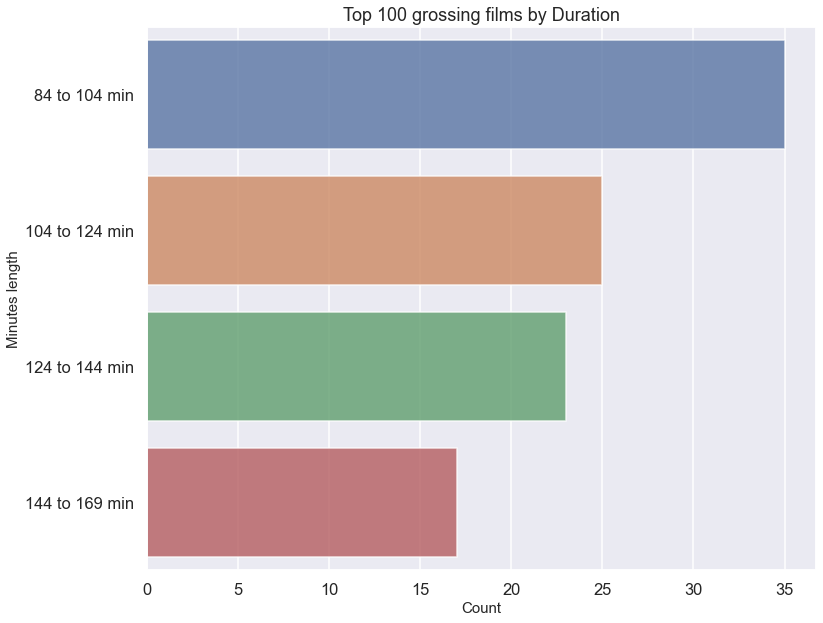

In [78]:
# Create a plot figure and define its size
plt.figure(figsize=(12, 10))
# Draw a seaborn barplot plotting range names on y-axis and counts of films 
# in range on the x-axis
sns.barplot(y=groups, x=df100['minute_range'].value_counts(
), alpha=0.8, palette="deep")
# Set title of plot
plt.title('Top 100 grossing films by Duration')
# Set y-axis label and font size
plt.ylabel('Minutes length', fontsize=15)
# Set x-axis label and font size
plt.xlabel('Count', fontsize=15)

# Show plot
plt.show()

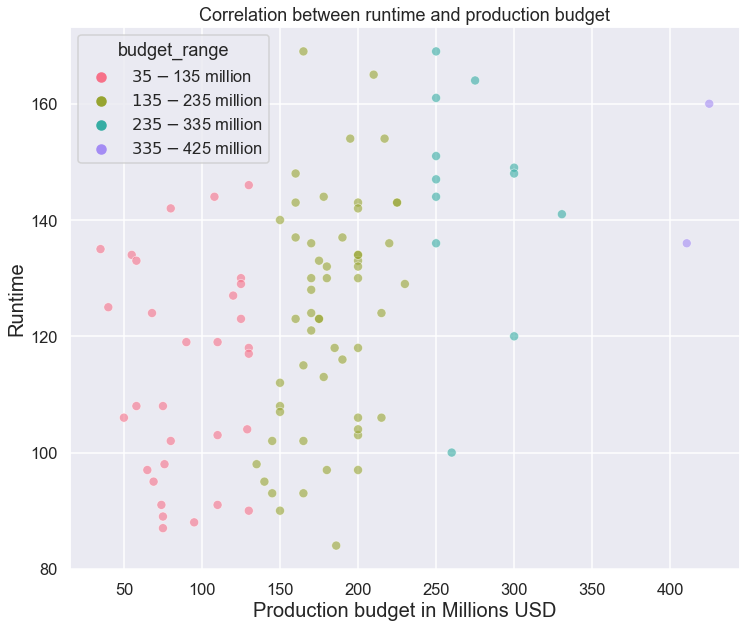

In [79]:
# Create a plot and set the appropriate size
plt.figure(figsize=(12, 10))
# Draw a seaborn scatterplot based on worldwide gross and production budget,
# divide the values by 1 million to make plot axes more readable.
sns.scatterplot(x=df100['production_budget']/1000000,
                y=df100['runtime_minutes'],hue=df100['budget_range'], alpha=0.6, palette='husl')
# Set title of plot
plt.title('Correlation between runtime and production budget')
# Set y-axis label and fontsize
plt.ylabel('Runtime', fontsize=20)
# Set x-axis label and fontsize
plt.xlabel('Production budget in Millions USD', fontsize=20)
# Change x-axis ticks from scientific notation to integers
plt.ticklabel_format(style='plain', axis='x')
# Change y-axis ticks from scientific notation to integers
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

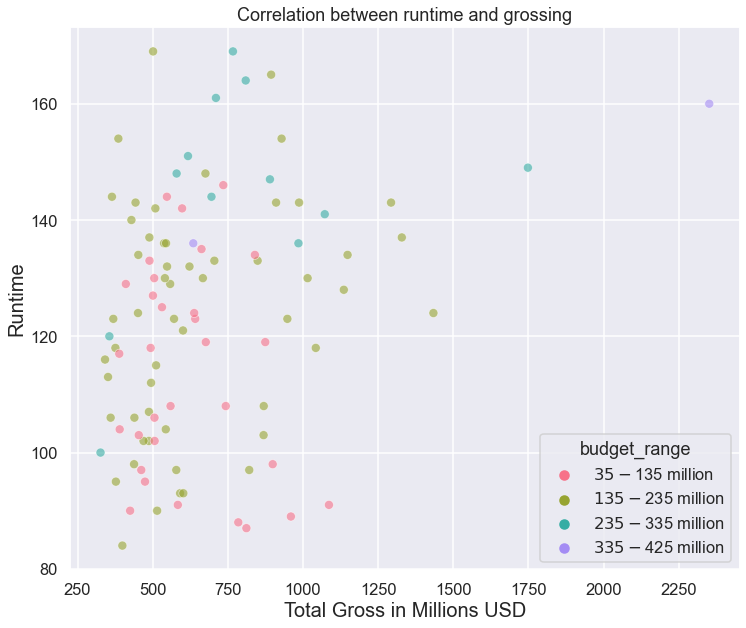

In [80]:
# Create a plot and set the appropriate size
plt.figure(figsize=(12, 10))
# Draw a seaborn scatterplot based on worldwide gross and production budget,
# divide the values by 1 million to make plot axes more readable.
sns.scatterplot(x=df100['total_gross']/1000000,
                y=df100['runtime_minutes'],hue=df100['budget_range'], alpha=0.6, palette='husl')
# Set title of plot
plt.title('Correlation between runtime and grossing')
# Set y-axis label and fontsize
plt.ylabel('Runtime', fontsize=20)
# Set x-axis label and fontsize
plt.xlabel('Total Gross in Millions USD', fontsize=20)
# Change x-axis ticks from scientific notation to integers
plt.ticklabel_format(style='plain', axis='x')
# Change y-axis ticks from scientific notation to integers
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

## Conclusions
This analysis leads to three recomendations to help save money and obtain profits

***

* The 3 top genres are the followings : 1st place is Adventure, 2nd Action and 3rd Sci-Fi
* The production budget should be around the 150 - 220 millions dollars.
* the runtime of the movie should be around 1:40 hours to 2:20 hours long movie

The 3 recomendations stated before could lead to a profit of 500 - 1000 million dollars
***

## Next Steps

***
* This model could use aditional infomartion such as Studios, Actors/Actress, Directors. To see if factors have an impact on the prdocution budget or in the monetary succes of a film.


In [81]:
 df100.loc['Avatar', 'Horror']

0.0